In [1]:
import pandas as pd
import MDAnalysis as mda
from rdkit.DataStructs import TanimotoSimilarity
import prolif as plf
from MDAnalysis.analysis import distances
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## TXS-ligand interaction summary

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/livtoft/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/converters/RDKit.py:977: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/Users/livtoft/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/converters/RDKit.py:977: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/Users/livtoft/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/converters/RDKit.py:977: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/Users/livtoft/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/converters/RDKit.py:977: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standa

<AxesSubplot:xlabel='Frame'>

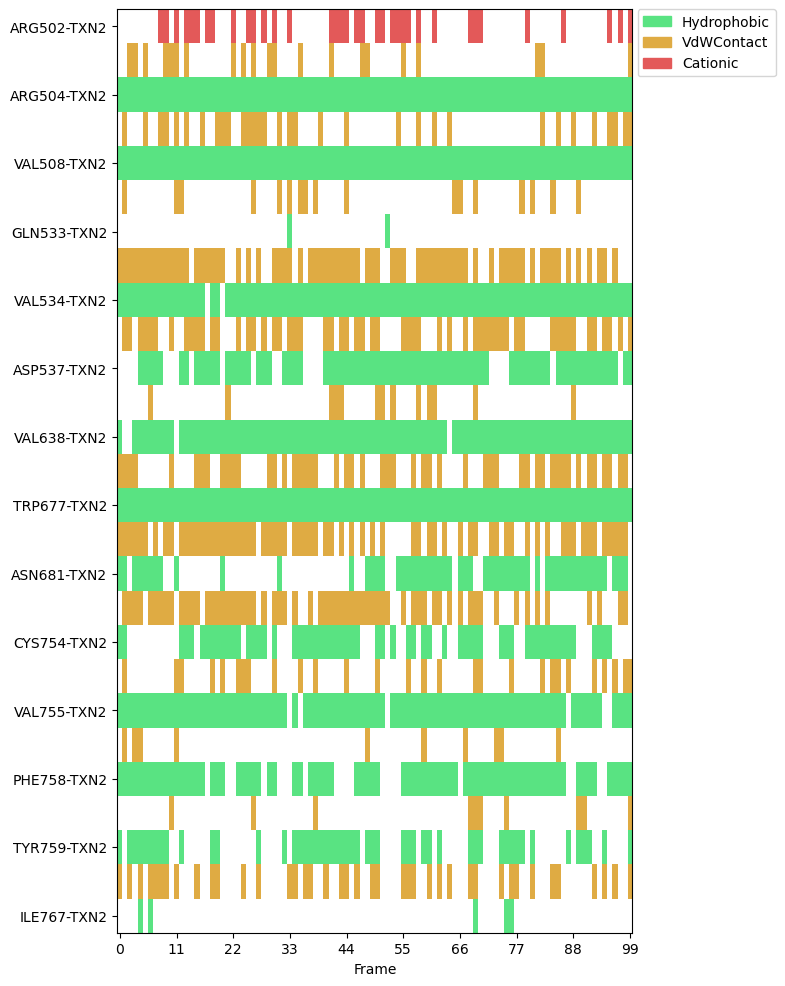

In [22]:
topo_file = "C529F-txn4.prmtop"
traj_file = "C529F-txn4.ncdf"
u = mda.Universe(topo_file, traj_file)

txs = u.select_atoms("protein")
ligand = u.select_atoms("resname TXN")
fp = plf.Fingerprint(['Hydrophobic', 'HBDonor', 'HBAcceptor', 'PiStacking', 'Anionic', 'Cationic', 'CationPi', 'PiCation', 'VdWContact'])
fp.run(u.trajectory, txs,ligand)

fp.plot_barcode()

## PPO and taxen-4-yl key distance summary

Text(0, 0.5, 'Distance (Angstrom)')

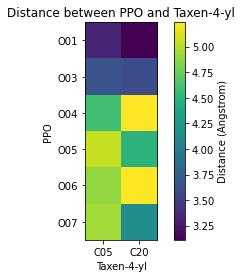

In [23]:
ppo = u.select_atoms("resname PPO and name O07 or name O03 or name O06 or name O01 or name O04 or name O05")
txn = u.select_atoms("resname TXN and name C20 or name C05")
dist_arr = distances.distance_array(ppo.positions, # reference
                         txn.positions, # configuration
                         box=u.dimensions)
                         
fig, ax = plt.subplots()
im = ax.imshow(dist_arr, origin='upper')

n_ppo = len(ppo)
n_txn = len(txn)

# add residue ID labels to axes
ax.set_yticks(np.arange(n_ppo))
ax.set_xticks(np.arange(n_txn))
ax.set_yticklabels(ppo.names)
ax.set_xticklabels(txn.names)

# add figure labels and titles
plt.ylabel('PPO')
plt.xlabel('Taxen-4-yl')
plt.title('Distance between PPO and Taxen-4-yl')

# colorbar
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')

In [24]:
pd.DataFrame(data=dist_arr, index=ppo.names, columns=txn.names).round(3)

,C05,C20
O01,3.335,3.112
O03,3.661,3.611
O04,4.594,5.237
O05,5.050,4.486
O06,4.895,5.235
O07,4.942,4.155
